In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact,interactive, interact_manual
from putils import *

In [2]:
def takens(t, x, A, B):
    return [
        x[1],
        -A-B*x[0]-x[0]*(x[1]*(x[0]+1)+x[0]*(x[0]-1)),
    ]


In [3]:
# armamos trayectoria partiendo de (x0, x1)
def solve_takens(A,B,x0,x1,Tmax):
    dt = 0.2
    t = np.arange(0, Tmax, dt)
    xini = [x0, x1]
    x = solve(takens, t, xini, args=(A, B), method='RK45')
    plot2D_labels(t,x,'A = ' + str(A) + ', B = ' + str(B))

In [4]:
# Calculo de las saddle node
def saddle_node_takens(b):
    x1 = (1+np.sqrt(1-3*b))/3
    x2 = (1-np.sqrt(1-3*b))/3
    a1 = x1*(-b+x1*(1-x1))
    a2 = x2*(-b+x2*(1-x2))
    return a1,a2

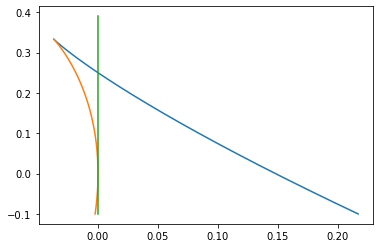

In [5]:
# Hopf
b0 = np.arange(-0.1,0.4,0.01)
a0 = b0*0
# Saddle Node
b = np.arange(-0.1,0.333,0.001)
a1,a2 = saddle_node_takens(b)
plt.plot(a1,b)
plt.plot(a2,b)
plt.plot(a0,b0)

In [7]:
iplot = interactive(solve_takens,
                    A=(-0.15,0.5,0.001),
                    B=(-0.15,0.35,0.001),
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    Tmax=(10,300,10),
                    continuous_update=False)
iplot

interactive(children=(FloatSlider(value=0.17500000000000002, description='A', max=0.5, min=-0.15, step=0.001),…

In [8]:
def takens_onoff(t, x, A, B, W):
    return [
        x[1],
        -x[2]-x[3]*x[0]-x[0]*(x[1]*(x[0]+1)+x[0]*(x[0]-1)),
        (x[3]-B),
        -W*(x[2]-A),
    ]


In [9]:
def solve_takens_onoff(A,B,C,W,x0,x1,Tmax):
    dt = 0.2
    t = np.arange(0, Tmax, dt)
    xini = [x0, x1, A+C, B]
    x = solve(takens_onoff, t, xini, args=(A,B,W), method='RK45')
    label = 'A = ' + str(A) + ', B = ' + str(B) + 'C = ' + str(C) + ', W = ' + str(W)
    ranges = np.array([[[-1.2,1.2],[-1,1]],[[-0.2,0.3],[-0.1,0.4]]])
    b0 = np.arange(-0.1,0.4,0.01)
    a0 = b0*0
    b = np.arange(-0.1,0.333,0.001)
    a1,a2 = saddle_node_takens(b)
    curves = [[a0,b0],[a1,b],[a2,b]]
    plot4D_labels(t,x,label,ranges,curves)

In [10]:
interact_manual(solve_takens_onoff,
                    A=(-0.15,0.3,0.001),
                    B=(-0.15,0.4,0.002),
                    C=(0,0.1,0.001),
                    W=(0,0.1,0.0001), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    Tmax=(10,1000,10))

interactive(children=(FloatSlider(value=0.07400000000000001, description='A', max=0.3, min=-0.15, step=0.001),…

<function __main__.solve_takens_onoff(A, B, C, W, x0, x1, Tmax)>